Install the necessary packages

In [ ]:
!pip install seaborn
!pip install scikit-learn

Import the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

Load the dataset

In [ ]:
data = pd.read_csv("student_extended_ml_dataset2.csv")

Basic EDA

In [ ]:
print("Basic EDA:")
print(data.info()) # Get general info about the dataset
print(data.describe()) # Get summary statistics of numerical columns
print(data.head()) # Display first few rows of the dataset

Basic EDA:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5000 non-null   object 
 1   Age                5000 non-null   int64  
 2   Gender             5000 non-null   object 
 3   Hours_Studied      5000 non-null   float64
 4   IQ                 5000 non-null   int64  
 5   Physics_Marks      5000 non-null   int64  
 6   Math_Marks         5000 non-null   int64  
 7   Chemistry_Marks    5000 non-null   int64  
 8   Has_Part_Time_Job  5000 non-null   bool   
 9   Study_Hours_Group  5000 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(3)
memory usage: 356.6+ KB
None
               Age  Hours_Studied           IQ  Physics_Marks   Math_Marks  \
count  5000.000000    5000.000000  5000.000000    5000.000000  5000.000000   
mean     31.444800       5.499279   114.915200      70.311000    69.8160

Univariate Analysis


Univariate Analysis:


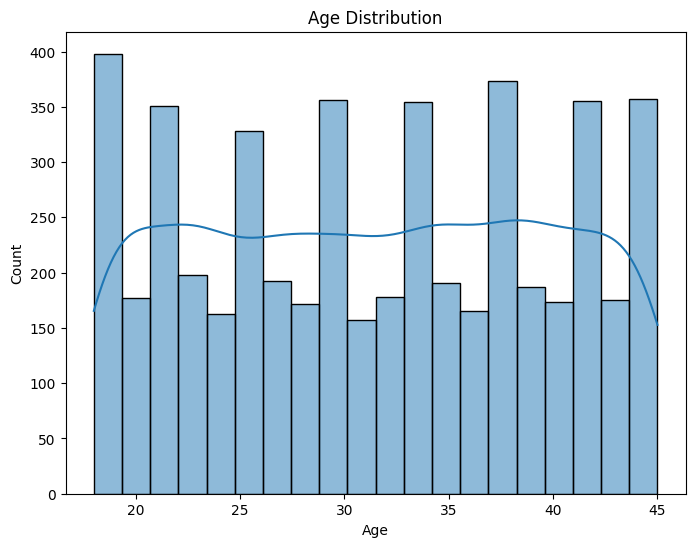

In [ ]:
print("\nUnivariate Analysis:")
# Histogram for Age
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

Bivariate Analysis


Bivariate Analysis:


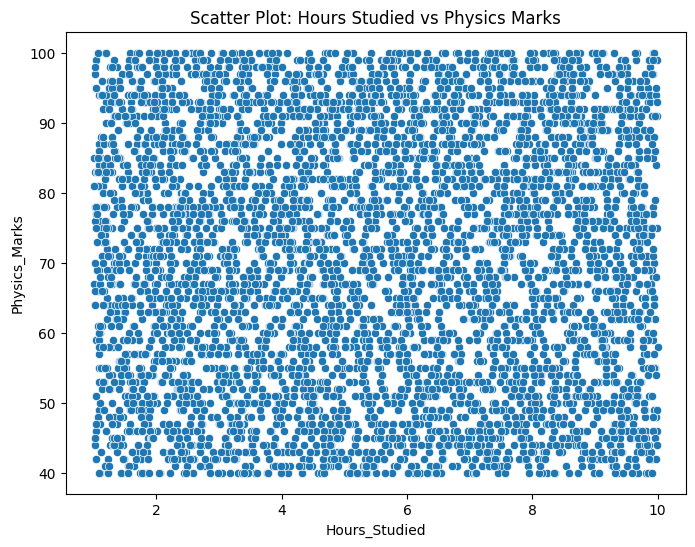

In [ ]:
print("\nBivariate Analysis:")
# Scatter plot between Hours_Studied and Physics_Marks
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Hours_Studied', y='Physics_Marks', data=data)
plt.title('Scatter Plot: Hours Studied vs Physics Marks')
plt.show()

Multivariate Analysis


Multivariate Analysis:


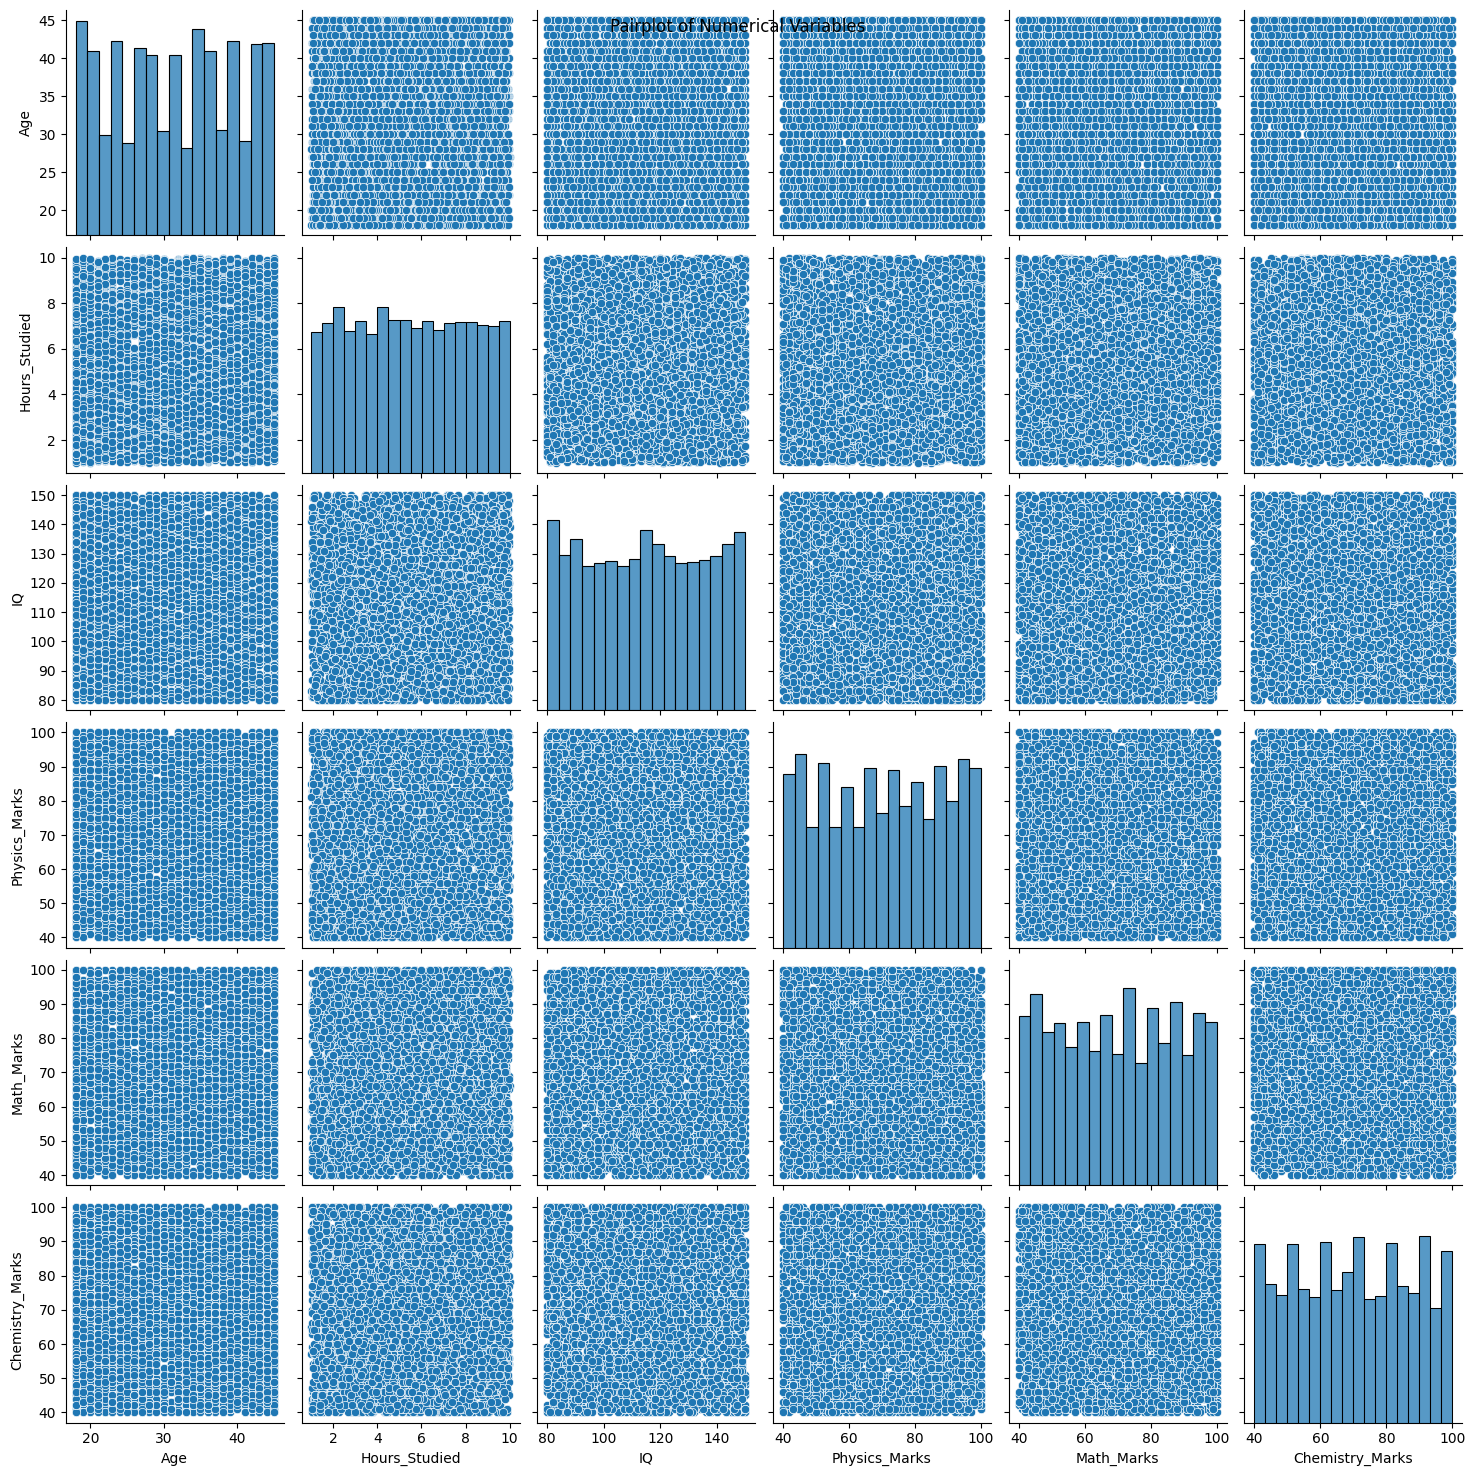

In [ ]:
print("\nMultivariate Analysis:")
# Pairplot for numerical columns
sns.pairplot(data[['Age', 'Hours_Studied', 'IQ', 'Physics_Marks', 'Math_Marks', 'Chemistry_Marks']])
plt.suptitle('Pairplot of Numerical Variables')
plt.show()

Correlation Matrix

In [ ]:
print("\nCorrelation Matrix:")
correlation_matrix = data.corr()
print(correlation_matrix)


Correlation Matrix:
                        Age  Hours_Studied        IQ  Physics_Marks  \
Age                1.000000       0.017165 -0.013193       0.010405   
Hours_Studied      0.017165       1.000000 -0.010782      -0.001311   
IQ                -0.013193      -0.010782  1.000000      -0.011610   
Physics_Marks      0.010405      -0.001311 -0.011610       1.000000   
Math_Marks        -0.010184       0.005998  0.000631       0.000443   
Chemistry_Marks   -0.009024      -0.000587 -0.027027      -0.001516   
Has_Part_Time_Job  0.000387       0.002944  0.005901       0.005244   

                   Math_Marks  Chemistry_Marks  Has_Part_Time_Job  
Age                 -0.010184        -0.009024           0.000387  
Hours_Studied        0.005998        -0.000587           0.002944  
IQ                   0.000631        -0.027027           0.005901  
Physics_Marks        0.000443        -0.001516           0.005244  
Math_Marks           1.000000        -0.004683          -0.014587  
Ch

Linear Regression

In [ ]:
print("\nLinear Regression:")


Linear Regression:


Prepare data for Linear Regression

In [ ]:
X = data[['Age', 'Hours_Studied', 'IQ', 'Math_Marks', 'Chemistry_Marks']]
y = data['Physics_Marks']

Split the data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Initialize and train the model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Make predictions

In [ ]:
y_pred = model.predict(X_test)

Evaluate the model

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 318.64240328156706
R-squared: 0.00021972069998410504


Visualize predictions vs actual values

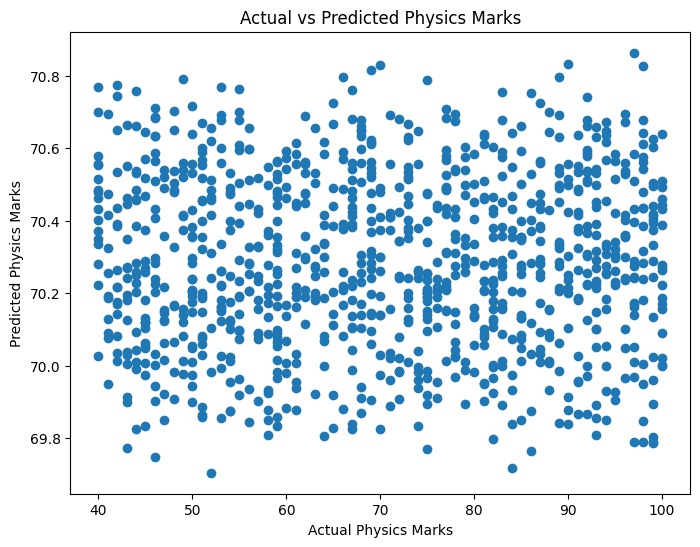

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Physics Marks")
plt.ylabel("Predicted Physics Marks")
plt.title("Actual vs Predicted Physics Marks")
plt.show()